## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy import stats
import numpy as np

# Study data files
mouse_metadata_path = "/Users/jlh/ucb-bel-data-pt-08-2020-u-c/02-Homework/05-Matplotlib/Instructions/Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "/Users/jlh/ucb-bel-data-pt-08-2020-u-c/02-Homework/05-Matplotlib/Instructions/Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_results = pd.merge(mouse_metadata, study_results, on="Mouse ID")
mouse_results2 = mouse_results
# Display the )data table for preview
mouse_results.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [2]:
# Checking the number of mice.
mouse_results["Mouse ID"].nunique()

249

In [3]:
mouse_ID_index = mouse_results.set_index

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#I want to use groupby to group by Mouse ID so that we can see the entries for each time period. 
groupby_mouse = mouse_results.groupby(["Mouse ID", "Timepoint"]).count()
groupby_mouse.sort_values(["Drug Regimen"], ascending=False).head(20)

Drug Regimen  Sex  Age_months  Weight (g)  \
Mouse ID Timepoint                                              
g989     20                    2    2           2           2   
         15                    2    2           2           2   
         10                    2    2           2           2   
         5                     2    2           2           2   
         0                     2    2           2           2   
a203     0                     1    1           1           1   
q633     0                     1    1           1           1   
q610     20                    1    1           1           1   
         25                    1    1           1           1   
         30                    1    1           1           1   
         35                    1    1           1           1   
q633     15                    1    1           1           1   
         5                     1    1           1           1   
         10                    1    1           1           1   
q610     10                    1    1           1           1   
q633     20                    1    1           1           1   
         25                    1    1           1           1   
q610     15                    1    1           1           1   
q597     45                    1    1           1           1   
q610     5                     1    1           1           1   

                    Tumor Volume (mm3)  Metastatic Sites  
Mouse ID Timepoint                                        
g989     20                          2                 2  
         15                          2                 2  
         10                          2                 2  
         5                           2                 2  
         0                           2                 2  
a203     0                           1                 1  
q633     0                           1                 1  
q610     20                          1                 1  
         25                          1                 1  
         30                          1                 1  
         35                          1                 1  
q633     15                          1                 1  
         5                           1                 1  
         10                          1                 1  
q610     10                          1                 1  
q633     20                          1                 1  
         25                          1                 1  
q610     15                          1                 1  
q597     45                          1                 1  
q610     5                           1                 1

In [5]:
#we use loc to identify the index number so we can remove those index values in our new data frame
rows_g989 = mouse_results.loc[mouse_results['Mouse ID'] == "g989",:]
rows_g989

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
#we manually select the data frames we want to drop, recreate our old data frame and reset the index
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_results = mouse_results.drop([909, 911, 913, 915, 917])
mouse_results = mouse_results.reset_index(drop=True)

In [7]:
#check to see if we've done everything properly. We have!
rows_g989_removed = mouse_results.loc[mouse_results['Mouse ID'] == "g989",:]
rows_g989_removed

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,5,48.786801,0
910,g989,Propriva,Female,21,26,10,51.745156,0
911,g989,Propriva,Female,21,26,15,51.325852,1
912,g989,Propriva,Female,21,26,20,55.326122,1
913,g989,Propriva,Female,21,26,25,56.045564,1
914,g989,Propriva,Female,21,26,30,59.082294,1
915,g989,Propriva,Female,21,26,35,62.570880,2


In [8]:
# Optional: Get all the data for the duplicate mouse ID. 



In [9]:
# Checking the number of mice in the clean DataFrame.
mouse_results["Mouse ID"].nunique()

249

In [10]:
#I think I can delete
groupby_mouse = mouse_results.groupby(["Mouse ID", "Timepoint"]).count()
groupby_mouse.sort_values(["Drug Regimen"], ascending=False).head()

Drug Regimen  Sex  Age_months  Weight (g)  \
Mouse ID Timepoint                                              
a203     0                     1    1           1           1   
q597     40                    1    1           1           1   
q633     10                    1    1           1           1   
         5                     1    1           1           1   
         0                     1    1           1           1   

                    Tumor Volume (mm3)  Metastatic Sites  
Mouse ID Timepoint                                        
a203     0                           1                 1  
q597     40                          1                 1  
q633     10                          1                 1  
         5                           1                 1  
         0                           1                 1

## Summary Statistics

In [11]:
#see how many regimens we have. Maybe try a groupby?
mouse_results_groupby = mouse_results.groupby(["Drug Regimen", "Mouse ID"]).mean()
mouse_results_groupby

Age_months  Weight (g)  Timepoint  Tumor Volume (mm3)  \
Drug Regimen Mouse ID                                                          
Capomulin    b128             9.0        22.0       22.5           41.963636   
             b742             7.0        21.0       22.5           40.083699   
             f966            16.0        17.0       10.0           36.505973   
             g288             3.0        19.0       22.5           41.990097   
             g316            22.0        22.0       22.5           44.613344   
...                           ...         ...        ...                 ...   
Zoniferol    q633            12.0        25.0       22.5           56.124896   
             s337            14.0        27.0       22.5           51.515155   
             w140            19.0        30.0        2.5           46.358976   
             w575            16.0        28.0       22.5           56.627561   
             x613             2.0        29.0        7.5           46.498216   

                       Metastatic Sites  
Drug Regimen Mouse ID                    
Capomulin    b128                   0.7  
             b742                   0.0  
             f966                   0.0  
             g288                   0.8  
             g316                   1.0  
...                                 ...  
Zoniferol    q633                   0.9  
             s337                   1.7  
             w140                   0.0  
             w575                   1.4  
             x613                   0.0  

[249 rows x 5 columns]

In [12]:
#mouse_results["Drug Regimen"].value_counts()
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mouse_results_mean = mouse_results.groupby(["Drug Regimen"]).mean()
mouse_results_mean = mouse_results_mean["Tumor Volume (mm3)"]

mouse_results_median = mouse_results.groupby(["Drug Regimen"]).median()
mouse_results_median = mouse_results_median["Tumor Volume (mm3)"]

mouse_results_var = mouse_results.groupby(["Drug Regimen"]).var(ddof=0)
mouse_results_var = mouse_results_var["Tumor Volume (mm3)"]

mouse_results_std = mouse_results.groupby(["Drug Regimen"]).std()
mouse_results_std = mouse_results_std["Tumor Volume (mm3)"]

mouse_results_sem = mouse_results.groupby(["Drug Regimen"]).sem()
mouse_results_sem = mouse_results_sem["Tumor Volume (mm3)"]


In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats = pd.DataFrame({"Tumor Mean": mouse_results_mean, "Tumor Median": mouse_results_median, "Tumor Variance": mouse_results_var,
                             "Tumor SD": mouse_results_std, "Tumor SEM": mouse_results_sem})
summary_stats
# This method is the most straighforward, creating multiple series and putting them all together at the end. use a for loop


,Tumor Mean,Tumor Median,Tumor Variance,Tumor SD,Tumor SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.839296,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.069446,6.268188,0.469821
Infubinol,52.884795,51.820584,42.886388,6.567243,0.492236
Ketapril,55.235638,53.698743,68.188930,8.279709,0.603860
Naftisol,54.331565,52.509285,65.817708,8.134708,0.596466
Placebo,54.033581,52.288934,60.830138,7.821003,0.581331
Propriva,52.393463,50.909965,42.862273,6.568014,0.525862
Ramicane,40.216745,40.673236,23.383692,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.122106,7.710419,0.573111


## Bar and Pie Charts

In [14]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mouse_treatments = mouse_results.groupby(["Drug Regimen"]).count()
mouse_treatments = mouse_treatments["Mouse ID"]
mouse_treatments
mouse_drugs = mouse_results["Drug Regimen"].unique()
mouse_drugs

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

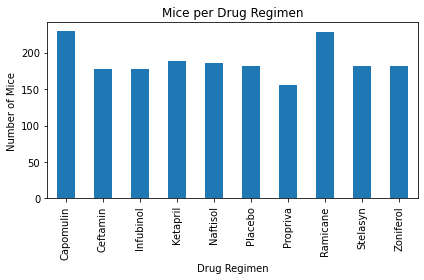

In [15]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mouse_treatments.plot.bar()
plt.ylabel("Number of Mice")
plt.xlabel("Drug Regimen")
plt.title("Mice per Drug Regimen")
plt.tight_layout()

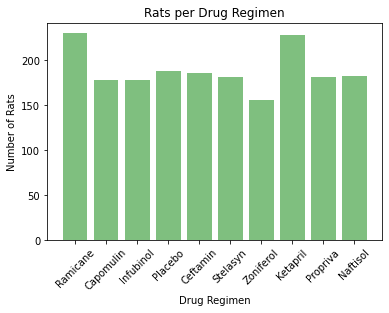

In [16]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x_axis = np.arange(len(mouse_drugs))
tick_locations = [value for value in x_axis]

plt.bar(x_axis, mouse_treatments, color='g', alpha = .5, align='center')
plt.xticks(tick_locations, mouse_drugs, rotation=45)
plt.ylabel("Number of Rats")
plt.xlabel("Drug Regimen")
plt.title("Rats per Drug Regimen");


In [17]:
mouse_gender = mouse_results.groupby(["Sex"]).count()
mouse_gender = mouse_gender['Drug Regimen']
mouse_gender

Sex
Female    930
Male      958
Name: Drug Regimen, dtype: int64

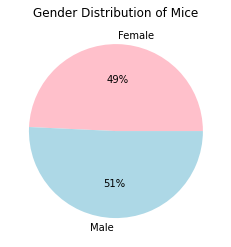

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mouse_gender = mouse_results.groupby(["Sex"]).count()
mouse_gender = mouse_gender['Drug Regimen']
mouse_gender

mouse_gender_categories = mouse_results["Sex"].unique()
mouse_categories = ["Female", "Male"]

mouse_total = mouse_results["Sex"].value_counts()
mouse_total, mouse_gender, mouse_gender_categories

colors = ["pink", "lightblue"]

plt.pie(mouse_gender, labels=mouse_categories, colors=colors, autopct="%1.0f%%",);
plt.title("Gender Distribution of Mice");

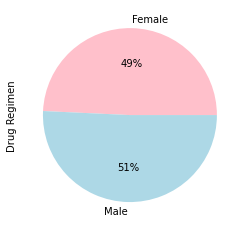

In [19]:
#creating a pie chart using pandas
mouse_gender.plot(kind="pie", subplots=True, autopct="%1.0f%%", colors=colors);


## Quartiles, Outliers and Boxplots

In [20]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
#to me this says final tumor volume as the last input for each mouse? lol loook below

# Start by getting the last (greatest) timepoint for each mouse
#treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
#for treatment in treatments:
    #mouse_treatments = mouse_results.loc(mouse_results[""])
#mouse_last = mouse_results.groupby(["Mouse ID"]).max()
#mouse_last - this is the incorrect thing I used

mouse_timepoint = mouse_results.groupby(["Mouse ID"])["Timepoint"].max()
mouse_timepoint
#mouse_sort = mouse_results.sort_values("Timepoint", ascending=False)
#mouse_sort
mouse_last = pd.merge(mouse_timepoint, mouse_results, on=["Timepoint", "Mouse ID"])
mouse_last
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Timepoint,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,45,a203,Infubinol,Female,20,23,67.973419,2
1,45,a251,Infubinol,Female,21,25,65.525743,1
2,45,a262,Placebo,Female,17,29,70.717621,4
3,45,a275,Ceftamin,Female,20,28,62.999356,3
4,30,a366,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,10,z435,Propriva,Female,12,26,48.710661,0
245,45,z578,Ramicane,Male,11,16,30.638696,0
246,45,z581,Infubinol,Female,24,25,62.754451,3
247,45,z795,Naftisol,Female,13,29,65.741070,3


In [21]:
#checking to see how the tumors regress
mouse = mouse_results.loc[mouse_results['Mouse ID'] == "z578"]
mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
75,z578,Ramicane,Male,11,16,0,45.000000,0
76,z578,Ramicane,Male,11,16,5,42.188787,0
77,z578,Ramicane,Male,11,16,10,42.952118,0
78,z578,Ramicane,Male,11,16,15,38.688516,0
79,z578,Ramicane,Male,11,16,20,36.890016,0
80,z578,Ramicane,Male,11,16,25,37.414114,0
81,z578,Ramicane,Male,11,16,30,37.815935,0
82,z578,Ramicane,Male,11,16,35,38.504824,0
83,z578,Ramicane,Male,11,16,40,34.022093,0
84,z578,Ramicane,Male,11,16,45,30.638696,0


In [22]:
#these are the last results of the mice on four drugs Capomulin, Ramicane, Infubinol and Ceftamin
four_drugs = mouse_last.loc[(mouse_last['Drug Regimen'] == "Capomulin") | (mouse_last['Drug Regimen'] == "Ramicane") | 
                            (mouse_last['Drug Regimen'] == "Infubinol") | (mouse_last['Drug Regimen'] == "Ceftamin"), :]
Campomulin_last = mouse_last.loc[mouse_last['Drug Regimen'] == "Capomulin"]
Ramicane_last = mouse_last.loc[mouse_last['Drug Regimen'] == "Ramicane"]
Infubinol_last = mouse_last.loc[mouse_last['Drug Regimen'] == "Infubinol"]
Ceftamin_last = mouse_last.loc[mouse_last['Drug Regimen'] == "Ceftamin"]
Ceftamin_last.head()

campo_drug_volume = Campomulin_last[["Drug Regimen", "Tumor Volume (mm3)"]]
rami_drug_volume = Ramicane_last[["Drug Regimen", "Tumor Volume (mm3)"]]
infu_drug_volume = Infubinol_last[["Drug Regimen", "Tumor Volume (mm3)"]]
cefta_drug_volume = Ceftamin_last[["Drug Regimen", "Tumor Volume (mm3)"]]

list_drug_volume = [campo_drug_volume, rami_drug_volume, infu_drug_volume, cefta_drug_volume]
list_drug_volume

for drugsvolume in list_drug_volume:
    print(f"mean is {drugsvolume.mean()}")
    print(f"median is {drugsvolume.median()}")

mean is Tumor Volume (mm3)    36.667568
dtype: float64
median is Tumor Volume (mm3)    38.125164
dtype: float64
mean is Tumor Volume (mm3)    36.19139
dtype: float64
median is Tumor Volume (mm3)    36.561652
dtype: float64
mean is Tumor Volume (mm3)    58.178246
dtype: float64
median is Tumor Volume (mm3)    60.16518
dtype: float64
mean is Tumor Volume (mm3)    57.753977
dtype: float64
median is Tumor Volume (mm3)    59.851956
dtype: float64


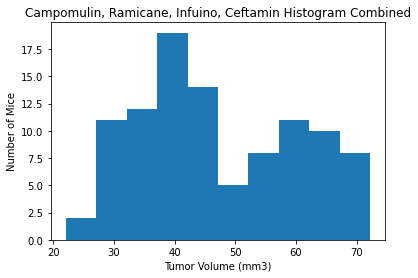

47.19779518950001
45.0
167.80310869419128
12.953883923140245
1.2953883923140244


In [23]:
#here we have all four drugs combined into one histogram.
plt.hist(four_drugs["Tumor Volume (mm3)"])
plt.title("Campomulin, Ramicane, Infuino, Ceftamin Histogram Combined")
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Number of Mice')
plt.show()

print(four_drugs['Tumor Volume (mm3)'].mean())
print(four_drugs['Tumor Volume (mm3)'].median())
print(four_drugs['Tumor Volume (mm3)'].var())
print(four_drugs['Tumor Volume (mm3)'].std())
print(four_drugs['Tumor Volume (mm3)'].sem())

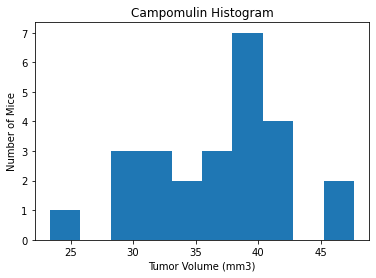

mean: 36.6675677192
median: 38.125164399999996
variance: 32.66337761307917
standard deviation: 5.715188327000185
standard error of the mean: 1.143037665400037
the iqr is 7.781863460000004
the upperq is 40.1592203, the lowerq is 32.37735684
the upperbound value is 51.83201549
the lowerbound value is 20.70456164999999
the largest volume is 47.68596303
the smallest volume is 23.34359787


In [24]:
#We're creating a histogram and summary statistics for Campomulin
plt.hist(Campomulin_last["Tumor Volume (mm3)"])
plt.title("Campomulin Histogram")
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Number of Mice')
plt.show()

print(f"mean: {Campomulin_last['Tumor Volume (mm3)'].mean()}")
print(f"median: {Campomulin_last['Tumor Volume (mm3)'].median()}")
print(f"variance: {Campomulin_last['Tumor Volume (mm3)'].var()}")
print(f"standard deviation: {Campomulin_last['Tumor Volume (mm3)'].std()}")
print(f"standard error of the mean: {Campomulin_last['Tumor Volume (mm3)'].sem()}")

quartiles_campo = Campomulin_last["Tumor Volume (mm3)"].quantile([.25, .5, .75])
lowerq_campo = quartiles_campo[.25]
upperq_campo = quartiles_campo[.75]
iqr_campo = upperq_campo - lowerq_campo
print(f"the iqr is {iqr_campo}")
print(f"the upperq is {upperq_campo}, the lowerq is {lowerq_campo}")
lowerbound_campo = lowerq_campo - (1.5*iqr_campo)
upperbound_campo = upperq_campo + (1.5*iqr_campo)
print(f"the upperbound value is {upperbound_campo}")
print(f"the lowerbound value is {lowerbound_campo}")
max_campo = Campomulin_last['Tumor Volume (mm3)'].max()
min_campo = Campomulin_last['Tumor Volume (mm3)'].min()
print(f"the largest volume is {max_campo}")
print(f"the smallest volume is {min_campo}")

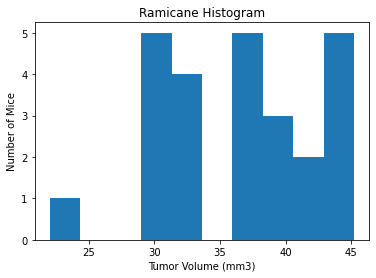

mean: 36.1913904284
median: 36.56165229
variance: 32.16635422825909
standard deviation: 5.671538964713113
standard error of the mean: 1.1343077929426226
the iqr is 9.098536719999998
the upperq is 40.65900627, the lowerq is 31.56046955
the upperbound value is 54.30681135
the lowerbound value is 17.912664470000003
the largest volume is 45.22086888
the smallest volume is 22.05012627


In [25]:
#We're creating a histogram and summary statistics for Ramicane
plt.hist(Ramicane_last["Tumor Volume (mm3)"])
plt.title("Ramicane Histogram")
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Number of Mice')
plt.show()

print(f"mean: {Ramicane_last['Tumor Volume (mm3)'].mean()}")
print(f"median: {Ramicane_last['Tumor Volume (mm3)'].median()}")
print(f"variance: {Ramicane_last['Tumor Volume (mm3)'].var()}")
print(f"standard deviation: {Ramicane_last['Tumor Volume (mm3)'].std()}")
print(f"standard error of the mean: {Ramicane_last['Tumor Volume (mm3)'].sem()}")

quartiles_rami = Ramicane_last["Tumor Volume (mm3)"].quantile([.25, .5, .75])
lowerq_rami = quartiles_rami[.25]
upperq_rami = quartiles_rami[.75]
iqr_rami = upperq_rami - lowerq_rami
print(f"the iqr is {iqr_rami}")
print(f"the upperq is {upperq_rami}, the lowerq is {lowerq_rami}")
lowerbound_rami = lowerq_rami - (1.5*iqr_rami)
upperbound_rami = upperq_rami + (1.5*iqr_rami)
print(f"the upperbound value is {upperbound_rami}")
print(f"the lowerbound value is {lowerbound_rami}")
max_rami = Ramicane_last['Tumor Volume (mm3)'].max()
min_rami = Ramicane_last['Tumor Volume (mm3)'].min()
print(f"the largest volume is {max_rami}")
print(f"the smallest volume is {min_rami}")

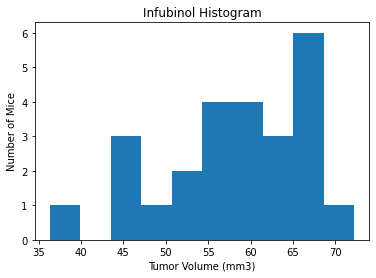

mean: 58.1782457852
median: 60.16518046
variance: 74.01087513388855
standard deviation: 8.602957348138403
standard error of the mean: 1.7205914696276807
the iqr is 11.477135160000003
the upperq is 65.52574285, the lowerq is 54.04860769
the upperbound value is 82.74144559000001
the lowerbound value is 36.83290494999999
the largest volume is 72.2267309
the smallest volume is 36.321345799999996


In [26]:
#We're creating a histogram and summary statistics for Infubinol
plt.hist(Infubinol_last["Tumor Volume (mm3)"])
plt.title("Infubinol Histogram")
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Number of Mice')
plt.show()

print(f"mean: {Infubinol_last['Tumor Volume (mm3)'].mean()}")
print(f"median: {Infubinol_last['Tumor Volume (mm3)'].median()}")
print(f"variance: {Infubinol_last['Tumor Volume (mm3)'].var()}")
print(f"standard deviation: {Infubinol_last['Tumor Volume (mm3)'].std()}")
print(f"standard error of the mean: {Infubinol_last['Tumor Volume (mm3)'].sem()}")

quartiles_infu = Infubinol_last["Tumor Volume (mm3)"].quantile([.25, .5, .75])
lowerq_infu = quartiles_infu[.25]
upperq_infu = quartiles_infu[.75]
iqr_infu = upperq_infu - lowerq_infu
print(f"the iqr is {iqr_infu}")
print(f"the upperq is {upperq_infu}, the lowerq is {lowerq_infu}")
lowerbound_infu = lowerq_infu - (1.5*iqr_infu)
upperbound_infu = upperq_infu + (1.5*iqr_infu)
print(f"the upperbound value is {upperbound_infu}")
print(f"the lowerbound value is {lowerbound_infu}")
max_infu = Infubinol_last['Tumor Volume (mm3)'].max()
min_infu = Infubinol_last['Tumor Volume (mm3)'].min()
print(f"the largest volume is {max_infu}")
print(f"the smallest volume is {min_infu}")

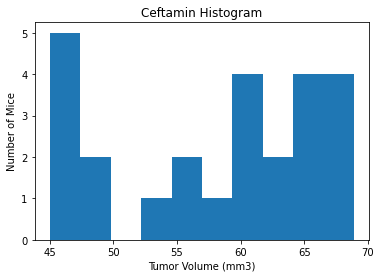

mean: 57.7539768252
median: 59.85195552
variance: 69.98273477172455
standard deviation: 8.365568406971791
standard error of the mean: 1.6731136813943581
the iqr is 15.577752179999997
the upperq is 64.29983003, the lowerq is 48.72207785
the upperbound value is 87.66645829999999
the lowerbound value is 25.355449580000002
the largest volume is 68.92318457
the smallest volume is 45.0


In [27]:
#We're creating a histogram and summary statistics for Ceftamin
plt.hist(Ceftamin_last["Tumor Volume (mm3)"])
plt.title("Ceftamin Histogram")
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Number of Mice')
plt.show()

print(f"mean: {Ceftamin_last['Tumor Volume (mm3)'].mean()}")
print(f"median: {Ceftamin_last['Tumor Volume (mm3)'].median()}")
print(f"variance: {Ceftamin_last['Tumor Volume (mm3)'].var()}")
print(f"standard deviation: {Ceftamin_last['Tumor Volume (mm3)'].std()}")
print(f"standard error of the mean: {Ceftamin_last['Tumor Volume (mm3)'].sem()}")

quartiles_cefta = Ceftamin_last["Tumor Volume (mm3)"].quantile([.25, .5, .75])
lowerq_cefta = quartiles_cefta[.25]
upperq_cefta = quartiles_cefta[.75]
iqr_cefta = upperq_cefta - lowerq_cefta
print(f"the iqr is {iqr_cefta}")
print(f"the upperq is {upperq_cefta}, the lowerq is {lowerq_cefta}")
lowerbound_cefta = lowerq_cefta - (1.5*iqr_cefta)
upperbound_cefta = upperq_cefta + (1.5*iqr_cefta)
print(f"the upperbound value is {upperbound_cefta}")
print(f"the lowerbound value is {lowerbound_cefta}")
max_cefta = Ceftamin_last['Tumor Volume (mm3)'].max()
min_cefta = Ceftamin_last['Tumor Volume (mm3)'].min()
print(f"the largest volume is {max_cefta}")
print(f"the smallest volume is {min_cefta}")

Text(0.5, 1.0, 'Drug Regimens')

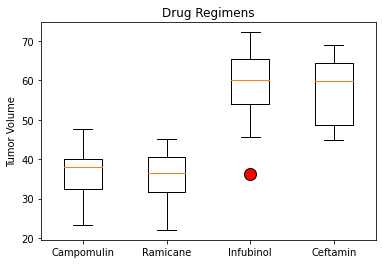

In [28]:
#Now we make our box plots all on the same chart. We highlight our outliers in red
flierprops = dict(marker='o', markerfacecolor='r', markersize=12,
                  linestyle='none')
#plt.boxplot(data, flierprops=flierprops)
plt.boxplot([Campomulin_last["Tumor Volume (mm3)"], 
             Ramicane_last["Tumor Volume (mm3)"],
            Infubinol_last["Tumor Volume (mm3)"],
            Ceftamin_last["Tumor Volume (mm3)"]], labels=["Campomulin", "Ramicane", "Infubinol", "Ceftamin"], flierprops=flierprops);
plt.ylabel("Tumor Volume");
plt.title("Drug Regimens")

## Line and Scatter Plots

Text(0.5, 0, 'Time')

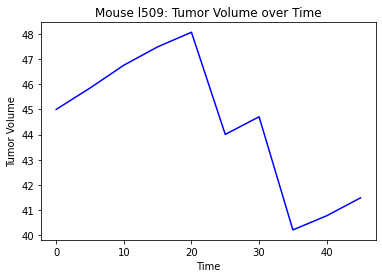

In [29]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin: one mouse over time.
#we use loc to determine the mouse
Campomulin_singlemouse_data = mouse_results.loc[(mouse_results['Drug Regimen'] == "Capomulin") & (mouse_results["Mouse ID"] == "l509")]
campo_mouse_timepoint = Campomulin_singlemouse_data["Timepoint"]
campo_mouse_vol = Campomulin_singlemouse_data["Tumor Volume (mm3)"]

plt.plot(campo_mouse_timepoint, campo_mouse_vol, color="b", alpha=1)
plt.title("Mouse l509: Tumor Volume over Time")
plt.ylabel("Tumor Volume")
plt.xlabel("Time")


In [56]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
#We use a groupby and loc  to find the weight and plot the tumor volumes
Campomulin_data = mouse_results.loc[(mouse_results['Drug Regimen'] == "Capomulin")]
campo_weight = Campomulin_data.groupby(["Mouse ID"]).mean()
campo_weight_gby = campo_weight["Weight (g)"]
campo_vol_gby = campo_weight["Tumor Volume (mm3)"]


In [57]:
campo_weight_gby.count()

25

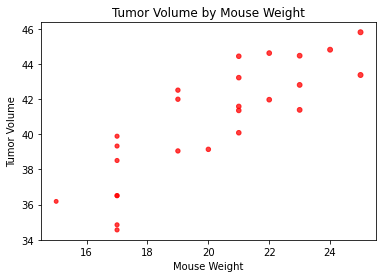

In [58]:
#create a scatter plot of the mice
plt.scatter(campo_weight_gby, campo_vol_gby, marker='o', facecolors='r', s=campo_weight_gby, alpha=.75)
plt.title("Tumor Volume by Mouse Weight")
plt.ylabel("Tumor Volume")
plt.xlabel("Mouse Weight")
plt.show()

## Correlation and Regression

In [60]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(campo_weight_gby,campo_vol_gby)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


In [66]:
#our linregress function to denote our statistics
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(campo_weight_gby, campo_vol_gby)

The r-squared is: 0.7088568047708717
y = 0.95x + 21.55


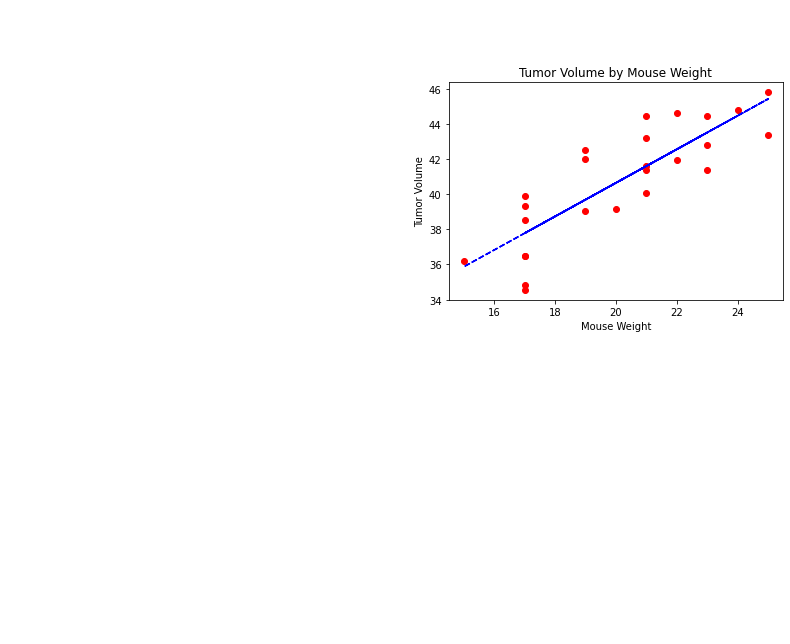

In [67]:
#Plot our regression line on top of our dot plot.
regress_values = campo_weight_gby * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
x = campo_weight_gby
y = campo_vol_gby
plt.scatter(x, y, color="r")
plt.plot(x,regress_values,"--",color='b')
plt.title("Tumor Volume by Mouse Weight")
plt.xlabel("Mouse Weight")
plt.ylabel("Tumor Volume")
plt.annotate(line_eq,(0,50),fontsize=15, color='r')
print(f"The r-squared is: {rvalue**2}")
plt.annotate(line_eq,(20,15),fontsize=15,color="blue")
print(line_eq)
plt.show()